# CASE STUDY with CREDIT SCORING

## 1. PROBLEM

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

- **Input**: Historical data of 250,000 borrowers.
- **Output**: SeriousDlqin2yrs.
- **Goal**: Build a model that borrowers can use to help make the best financial decisions.

Reference: [Kaggle Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Variables descriptions

|Variables|Descriptions|
|-|-|
|**SeriousDlqin2yrs**| Person experienced 90 days past due delinquency or worse|
|**RevolvingUtilizationOfUnsecuredLines**| Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (Tổng số dư trên thẻ tín dụng và hạn mức tín dụng cá nhân ngoại trừ bất động sản và không có nợ trả góp như khoản vay mua ô tô chia cho tổng hạn mức tín dụng)|
|**age**| Age of borrower in years|
|**NumberOfTime30-59DaysPastDueNotWorse**| Number of times borrower has been 30-59 days past due but no worse in the last 2 years|
|**DebtRatio**| Monthly debt payments, alimony,living costs divided by monthy gross income (Thanh toán nợ hàng tháng, cấp dưỡng, chi phí sinh hoạt chia cho tổng thu nhập hàng tháng)|
|**MonthlyIncome**| Monthly income|
|**NumberOfOpenCreditLinesAndLoans**| Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) -> Số khoản vay và thẻ tín dụng|
|**NumberOfTimes90DaysLate**| Number of times borrower has been 90 days or more past due|
|**NumberRealEstateLoansOrLines**| Number of mortgage and real estate loans including home equity lines of credit (Số lượng các khoản vay thế chấp và bất động sản bao gồm hạn mức tín dụng vốn chủ sở hữu nhà)|
|**NumberOfTime60-89DaysPastDueNotWorse**| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|**NumberOfDependents**| Number of dependents in family excluding themselves (spouse, children etc.)|

Random Forest:
- Handle well with different types of features: numerical/ categorical

### 2.2 Statistics

**Q1: Import necessary libraries: Pandas, Numpy, Matplotlib, Seaborn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2: Load data using pd.read_csv()**

In [2]:
df_train=pd.read_csv('cs-training.csv')
df_test= pd.read_csv('cs-test.csv')

**Q3: Get the first 5 rows of train set**

In [3]:
df_train.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Q4: Get number of rows and columns of  train set**

In [4]:
df_train.shape

(150000, 11)

**Q5: Describe the distribution of train set**

In [5]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**Q6: Get information of train set by df.info()**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

**Q7: Get the missing percent per columns of train set**
( Null do quá trình thu thập dữ liệu có vấn đề hoặc do bản thân dữ liệu )

In [7]:
df_train.isna().sum() #co bao nhieu thang bj missing

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df_train.isna().sum()*100/len(df_train) #tinh % du lieu missing, tim nguyen nhan missing de dua ra cach xu ly tuong ung
# viec thu thap du lieu doi khi bi sai lech or do chinh KH khong tra loi cau hoi (monthly income)

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

### 2.3 Visualization

**Q8: Target disitribution on train set via bar chart**

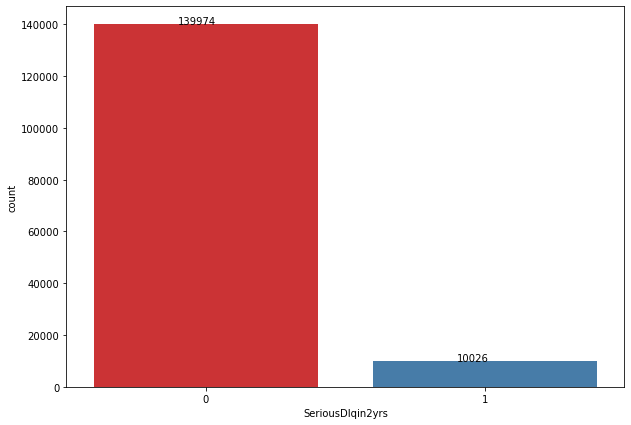

In [9]:
#c1. su dung batplot cua seaborn or bar cua mpt, sau do dung value_count
#c2. count plot, dem ban ghi unique
#tao 1 khung tranh truoc
plt.figure(figsize=(10,7))
ax=sns.countplot(x= df_train.SeriousDlqin2yrs, palette='Set1') #số lượng nhãn xem tỷ lệ phân bổ của 2 nhãn
for p, label in zip(ax.patches, df_train.SeriousDlqin2yrs.value_counts()):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+0.5)) #truyền location thì mặc định 
#=> đếm bản ghi unique, xip nối tương ứng của
#patches với giá trị của SDL)
plt.show()

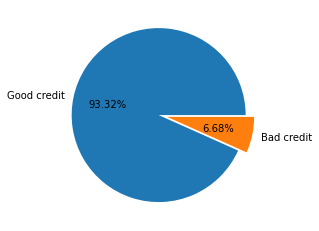

In [10]:
#pie chart
plt.pie(df_train.SeriousDlqin2yrs.value_counts(), labels=['Good credit','Bad credit'], autopct='%.2f%%', explode=[0,0.1])
plt.show() #Precision, Recall ,F-1score, AUC, Gini evaluation metrics
#nhãn 50-50 thì gọi là tập dữ liệu balance,trong thực tế thì k có thu thập được dữ liệu đẹp ntn

**Q9: Correlation of features and target**

<AxesSubplot:>

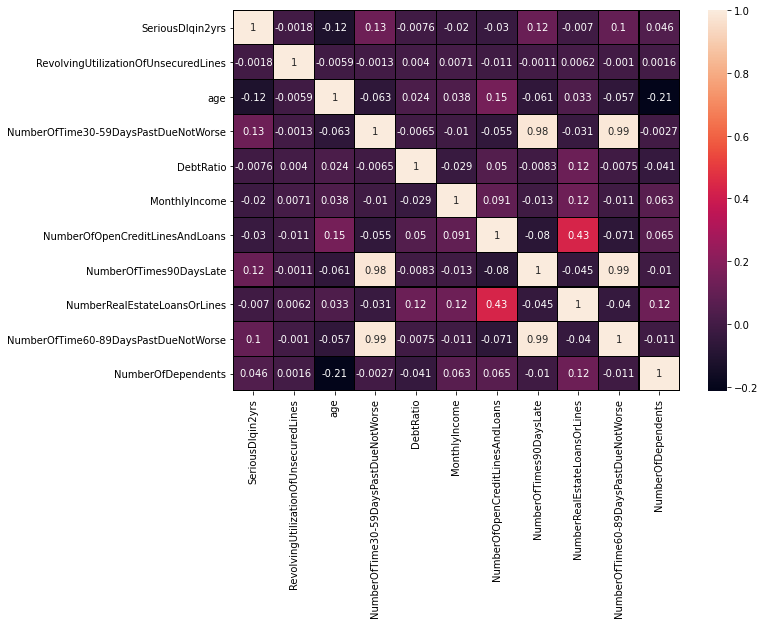

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_train.corr(), annot=True, linewidths=0.1, linecolor='black')
#khi xây dựng bài toán số lượng biến rất nhiều, việc chạy hết tất cả vào 1 đồ thị thì k phải lúc nào cũng mang
#lại kết quả tốt, k phải đặc trưng nào cũng tốt.
#mình có thể lọc để chọn đặc trưng và đánh giá tốt cho mô hình của mình/
#làm thế nào để biết feature tốt? các biến với nhãn của mình tương quan với cột đầu tiên và hàng trên cùng #gtri càng lớn thì càng tương quan cùng hoowngs a tăng thì b tăng chạy từ -1, 1
#thứ 2 là quan tâm các feature với nhau independent variable features thì lây giá trị khoảng giữa
#ví dụ <-0.9 or >0.9 thì loại đi, vì nó cùng hướng nên loại đi
#khi so sánh với nhãn và labels của mình vd SeriousD.. lấy đặc trưng có giá trị cao thì mô hình đánh giá tốt hơn, loại giá trị nhỏ
# kết quả Gini phải là 70, thì phải chạy mô hình sao cho Gini=70 mới dừng lại

**Q10: Describe features distribution and correlation given histogram and pairplot chart**

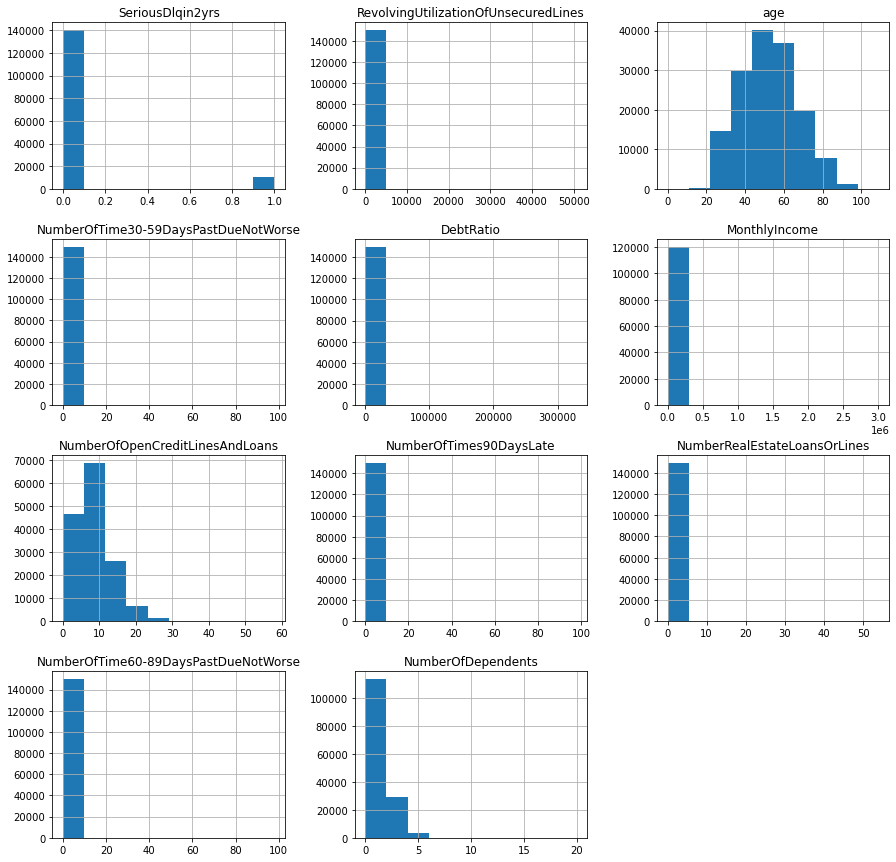

In [12]:
df_train.hist(figsize=(15,15))
plt.show()
#tại sao với number of time 3--50... chỉ có 1 cột thôi. bin mặc định là 10, giá trị giao động mặc định xuất hiện outlier
# chỉ có 1 2 bản ghi thì phân bố đều siêu nhỏ lại và hiện outlier ra , có thể coi nhiễu cho MH, ảnh hưởng xấu đến chất lượng mô hình
#loại bỏ đi noise để phân bố biến để về phân phối chuẩn.


**Q11: Explore each feature with target**

In [13]:
#BTVN

## 3. MODEL

**Q12: Handle outliers in dataset**

In [14]:
# # **Q12: Handle outliers in dataset**
# #     -Percentile
# #     - Decile
# #     - Quantile
# #     - Quartile: tứ phân vị, chia phân phối ra 4 phần bằng nhau, được đánh giá tương ứng với hàm describe
#         Q1-Q2-Q3: trong khoảng 1-3 thì là interquantile, thì lấy , còn ở ngoài là outliers là những điểm nằm ngoài
#         Q1-1.5iqr hoặc Q3+1.5IQR

In [15]:
from collections import Counter
def detect_outliers(df, n, features):
    outlier_indices=[]
#     #iterate over features(lặp qua tất cả các feature)
    for col in features:
#     #tính được first quantile (25%)=>Q1
        Q1=np.percentile(df[col], 25)
#     #tính được third quantile(75%) =>Q3X
        Q3=np.percentile(df[col], 75)
#     #tính khoảng interquantile(IQR)
        IQR= Q3-Q1
#     #tính outliers steps. Q1-1.5iqr hoặc Q3+1.5IQR
        outlier_step=1.5*IQR
#     #Tìm danh sách index coi nó là outliers (coongjn lại và so sánh các index)
        outlier_list_col= df[(df[col]<Q1-outlier_step)|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
#     #chọn bản ghi mà chứa nhiều hơn bao nhiêu đấy (n) outliers 
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=[k for k, v in outlier_indices.item() if v>n] #(lấy dictionary chuỗi luôn {key:value, key:value...})
#     return bản ghi
    return multiple_outliers

In [16]:
from collections import Counter
def detect_outliers(df, n, features):
    
    outlier_indices = []
    
    # iterate over features
    for col in features:
        # 1st quartile (25%) => Q1
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%) => Q3
        Q3 = np.percentile(df[col], 75)
        
        # Interquartile - IQR
        IQR = Q3 - Q1
        
        # Outlier steps < Q1 - 1.5 IQR, > Q3 + 1.5 IQR => condition
        outlier_step = 1.5*IQR
        
        
        # Determine a list of indice of outlier
        
        outlier_list_col = df[(df[col]< Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index #conditions
        
        outlier_indices.extend(outlier_list_col)
        
        
    # select records containing more n outliers
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n]
    
    return multiple_outliers

In [17]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [18]:
Outlier_to_drop= detect_outliers(df_train,2,['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'])
len(Outlier_to_drop)*100/len(df_train)

2.3513333333333333

In [19]:
len(df_train)

150000

In [20]:
df_train = df_train.drop(Outlier_to_drop, axis=0)

In [21]:
len(df_train)

146473

**Q13: Merge train and test dataset**

In [22]:
dataset=pd.concat([df_train, df_test])
len(dataset), len (df_train) +len(df_test)

(247976, 247976)

In [23]:
dataset.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

**Q14: Rename columns name into shorter alias**

In [24]:
dataset=dataset.rename(columns={'SeriousDlqin2yrs': 'Target', 'RevolvingUtilizationOfUnsecuredLines':'UnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                       'NumberOfOpenCreditLinesAndLoans':'OpenCredit', 'NumberOfTimes90DaysLate':'Late90',
                       'NumberRealEstateLoansOrLines':'PropLines','NumberOfTime60-89DaysPastDueNotWorse':'Late6089',
                      'NumberOfDependents':'Deps'})
dataset.head(5)

,Target,UnsecuredLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Q15: Building binary/dummy variables**

In [25]:
dataset.UnsecuredLines=pd.qcut(dataset.UnsecuredLines.values, 5).codes

In [28]:
dataset.columns

Index(['Target', 'UnsecuredLines', 'age', 'Late3059', 'DebtRatio',
       'MonthlyIncome', 'OpenCredit', 'Late90', 'PropLines', 'Late6089',
       'Deps'],
      dtype='object')

In [29]:
dataset.head(5)

,Target,UnsecuredLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1.0,4,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,4,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,3,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,2,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,4,49,1,0.024926,63588.0,7,0,1,0,0.0


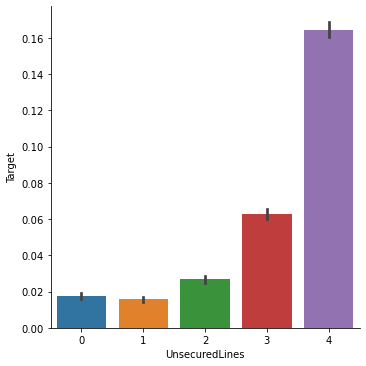

In [30]:
g=sns.catplot(x='UnsecuredLines', y='Target', data=dataset, kind='bar')
plt.show()
#tìm ra mqh giữa biến và target, đồng thời giảm số lượng biến xuống.
#chia dữ liệu thành nhóm dữ liệu 3-10 nhóm, để tìm tương quan.

In [39]:
dataset.age=pd.cut(dataset.age.values, 5).codes

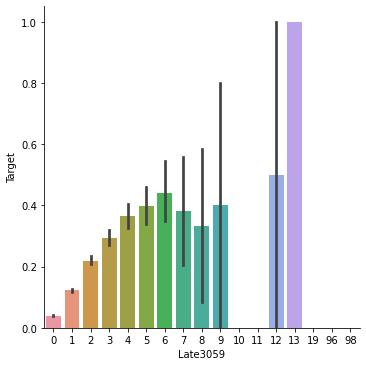

In [35]:
g=sns.catplot(x='Late3059', y='Target', data=dataset, kind='bar')
plt.show()

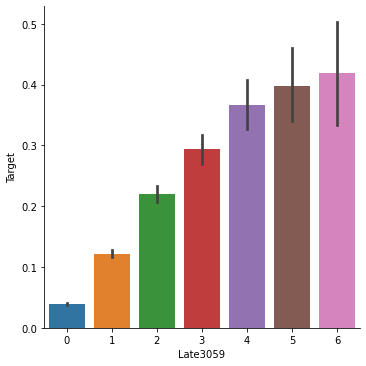

In [36]:
dataset.Late3059=[x if x<6 else 6 for x in dataset.Late3059]
g=sns.catplot(x='Late3059', y='Target', data=dataset, kind='bar')
plt.show()

In [44]:
dataset.DebtRatio = pd.cut(dataset.DebtRatio.values, 5).codes
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median()) #scalar, mean, median, mode
dataset.MonthlyIncome = pd.cut(dataset.MonthlyIncome.values, 5).codes
dataset.OpenCredit = pd.cut(dataset.OpenCredit.values, 5).codes
dataset.Late90 = [x if x < 5 else 5 for x in dataset.Late90]
dataset.PropLines = [x if x < 6 else 6 for x in dataset.PropLines]
dataset['Late6089'] = [x if x < 6 else 6 for x in dataset['Late6089']]
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())
dataset.Deps = [x if x < 4 else 4 for x in dataset.Deps]

In [45]:
dataset = pd.get_dummies(dataset, columns=['UnsecuredLines'], prefix = 'UnsecuredLines')
dataset = pd.get_dummies(dataset, columns=['age'], prefix = 'age')
dataset = pd.get_dummies(dataset, columns=['Late3059'], prefix = 'Late3059')
dataset = pd.get_dummies(dataset, columns=['DebtRatio'], prefix = 'DebtRatio')
dataset = pd.get_dummies(dataset, columns=['MonthlyIncome'], prefix = 'MonthlyIncome')
dataset = pd.get_dummies(dataset, columns=['OpenCredit'], prefix = 'OpenCredit')
dataset = pd.get_dummies(dataset, columns=['Late90'], prefix = 'Late90')
dataset = pd.get_dummies(dataset, columns=['PropLines'], prefix = 'PropLines')
dataset = pd.get_dummies(dataset, columns=['Late6089'], prefix = 'Late6089')
dataset = pd.get_dummies(dataset, columns=['Deps'], prefix = 'Deps')


In [46]:
dataset.head(5)

,Target,UnsecuredLines_0,UnsecuredLines_1,UnsecuredLines_2,UnsecuredLines_3,UnsecuredLines_4,age_0,age_1,age_2,age_3,...,Late6089_2,Late6089_3,Late6089_4,Late6089_5,Late6089_6,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


**Q16: Train test split**

In [49]:
train=dataset[:len(df_train)]
test=dataset[len(df_train):]
test.drop(labels=['Target'], axis=1)

,UnsecuredLines_0,UnsecuredLines_1,UnsecuredLines_2,UnsecuredLines_3,UnsecuredLines_4,age_0,age_1,age_2,age_3,age_4,...,Late6089_2,Late6089_3,Late6089_4,Late6089_5,Late6089_6,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
101499,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101500,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
101501,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
len(train), len(test)

(146473, 101503)

In [51]:
X_train=train.drop(labels=['Target'], axis=1)
y_train=train['Target'].astype(int)

**Q17: Train prediction model using Random Forest Classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf=clf.fit(X_train, y_train)

**Q18: Get feature importance from classifier**

In [59]:
features=pd.DataFrame()
features['feature']=X_train.columns
features['importance']=clf.feature_importances_


In [63]:
features.sort_values(by=['importance'], ascending=True)
features

,feature,importance
0,UnsecuredLines_0,1.252265e-02
1,UnsecuredLines_1,1.216740e-02
2,UnsecuredLines_2,1.366977e-02
3,UnsecuredLines_3,1.774122e-02
4,UnsecuredLines_4,6.981727e-02
5,age_0,2.901737e-02
6,age_1,3.105531e-02
7,age_2,3.048758e-02
8,age_3,2.356796e-02
9,age_4,1.761912e-02


**Q19: Retrain with better parameters**

**Q20: Predict and evaluate the model performance**